# Análise de Produção de Procedimentos de Saúde — Santa Rosa

---




## Índice

1. [Introdução](#introducao)  
2. [Etapas de Análise](#etapas)  
   - [1. Análise Exploratória de Dados (EDA)](#eda)  
   - [2. Limpeza e Preparação dos Dados](#limpeza)  
   - [3. Análises Estratégicas para o Gestor de Saúde do Município](#analises)  
     - [3.1 Volume e Perfil dos Procedimentos](#volume)  
     - [3.2 Produção por Estabelecimento de Saúde](#estabelecimento)  
     - [3.3 Perfil Demográfico e Epidemiológico](#perfil)  
     - [3.4 Fluxos Regionais e Acesso](#fluxos)  
     - [3.5 Recursos Financeiros](#recursos)  
     - [3.6 Foco em Áreas Críticas](#foco)  
     - [3.7 Comparações e Tendências](#comparacoes)  
4. [Anexos e Referências](#anexos)

---



<a id="introducao"></a>
## 1. Introdução

Este notebook organiza, sem código, os resultados e a apresentação das análises solicitadas sobre os procedimentos ambulatoriais e hospitalares realizados em **Santa Rosa**.  
Use cada seção para colar tabelas, gráficos e observações. Indicamos também queries SQL e/ou procedimentos ETL sugeridos quando pertinente.



<a id="etapas"></a>
## 2. Etapas de Análise (resumo)

Abaixo estão as etapas principais. Em cada sub-seção há espaço para: *objetivo*, *método/consulta usada*, *tabelas/resultados* e *insights*.



<a id="eda"></a>
### 2.1 Análise Exploratória de Dados (EDA)

**Objetivos**
- Conhecer dimensão do dataset e tipos de variáveis.
- Obter estatísticas descritivas iniciais.
- Identificar valores faltantes e inválidos.


**Detecção de problemas**
- Valores ausentes (NaN / vazio) — listar colunas e contagens.
- Valores inválidos (ex.: idade fora da faixa, sexo ≠ M/F, CIDs inconsistentes) — listar exemplos e contagens.



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE pars;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 'pars':")
display(df)



Estrutura da tabela 'pars':


,Field,Type,Null,Key,Default,Extra
0,PA_CODUNI,varchar(20),YES,,None,
1,PA_GESTAO,varchar(20),YES,,None,
2,PA_CONDIC,varchar(20),YES,,None,
3,PA_UFMUN,varchar(10),YES,,None,
4,PA_REGCT,varchar(20),YES,,None,
5,PA_INCOUT,varchar(20),YES,,None,
6,PA_INCURG,varchar(20),YES,,None,
7,PA_TPUPS,varchar(20),YES,,None,
8,PA_TIPPRE,varchar(20),YES,,None,
9,PA_MN_IND,varchar(20),YES,,None,


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE s_cid;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 's_cid':")
display(df)



Estrutura da tabela 's_cid':


,Field,Type,Null,Key,Default,Extra
0,cd_cod,char(4),YES,,None,
1,opc,char(1),YES,,None,
2,cat,char(1),YES,,None,
3,subcat,char(1),YES,,None,
4,cd_descr,char(50),YES,,None,
5,restrsexo,char(1),YES,,None,
6,campos_rad,char(3),YES,,None,
7,estadio,char(1),YES,,None,
8,repete_rad,char(1),YES,,None,


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE tb_sigtaw;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 'tb_sigtaw':")
display(df)

connection.close()

Estrutura da tabela 'tb_sigtaw':


,Field,Type,Null,Key,Default,Extra
0,ip_cod,char(10),YES,,None,
1,ip_dscr,char(150),YES,,None,


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE tb_municip;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 'tb_municip':")
display(df)


Estrutura da tabela 'tb_municip':


,Field,Type,Null,Key,Default,Extra
0,co_municip,char(6),YES,,None,
1,co_municdv,char(7),YES,,None,
2,co_status,char(7),YES,,None,
3,co_tipo,char(7),YES,,None,
4,ds_nome,char(48),YES,,None,
5,ds_nomepad,char(48),YES,,None,
6,ds_observ,char(1),YES,,None,
7,co_regiao,char(1),YES,,None,
8,co_uf,char(2),YES,,None,
9,co_alter,char(1),YES,,None,



<a id="limpeza"></a>
### 2.2 Limpeza e Preparação dos Dados

**Objetivos**
- Corrigir problemas identificados na EDA.
- Produzir um dataset pronto para análise estratégica.

**Estratégias propostas**
- Valores nulos: apresentar contagem e a ação aplicada (apagar linhas ou preencher com "Não informado").
- Inconsistências: descrição das regras de normalização (ex.: padronizar nomes de municípios, especialidades).
- Duplicações: número de registros duplicados encontrados e ação (remoção).

**Tabela de antes/depois**
- Colocar uma tabela resumo com contagens “antes” e “depois” por tipo de limpeza.

**Observações**
- Registrar decisões de imputação/exclusão para auditoria.



<a id="analises"></a>
## 3. Análises Estratégicas para o Gestor de Saúde do Município

Nesta seção, cole resultados, tabelas e gráficos finais que respondam às perguntas estratégicas.



<a id="volume"></a>
### 3.1 Volume e Perfil dos Procedimentos

**Perguntas-chave**
- Quantos procedimentos ambulatoriais foram realizados em Santa Rosa no último mês, trimestre e ano?

**Observação técnica**
- Gerar a granularidade temporal a partir do arquivo `04-gera-dimtempo-mysql.sql` (usar dim_tempo para agrupar por mês/trimestre/ano).

**Tabelas / Gráficos a incluir**
- Tabela: contagem de procedimentos por período (mês / trimestre / ano).
- Gráfico: série temporal com tendência (últimos 24 meses).
- Tabela: distribuição por especialidade/procedimento (consultas, exames de imagem, oncologia, psiquiatria, etc).
- Análise de picos e quedas na demanda (datas e possíveis causas).

**Espaço para resultados**
- Número procedimentos (mês): `______`  
- Número procedimentos (trimestre): `______`  
- Número procedimentos (ano): `______`

**Insights**
- (encher com comentários)


3.1 VOLUME E PERFIL DOS PROCEDIMENTOS - SANTA ROSA

1. RESUMO: PROCEDIMENTOS POR PERÍODO
------------------------------------------------------------------------------------------------------------------------
              periodo  total_procedimentos
           Último mês                    0
     Último trimestre                    0
Mês de agosto de 2025                 4029


2. DISTRIBUIÇÃO POR ESPECIALIDADE/PROCEDIMENTO (TOP 25)
------------------------------------------------------------------------------------------------------------------------
              periodo  total_procedimentos
           Último mês                    0
     Último trimestre                    0
Mês de agosto de 2025                 4029


2. DISTRIBUIÇÃO POR ESPECIALIDADE/PROCEDIMENTO (TOP 25)
------------------------------------------------------------------------------------------------------------------------
                                                                                      pr

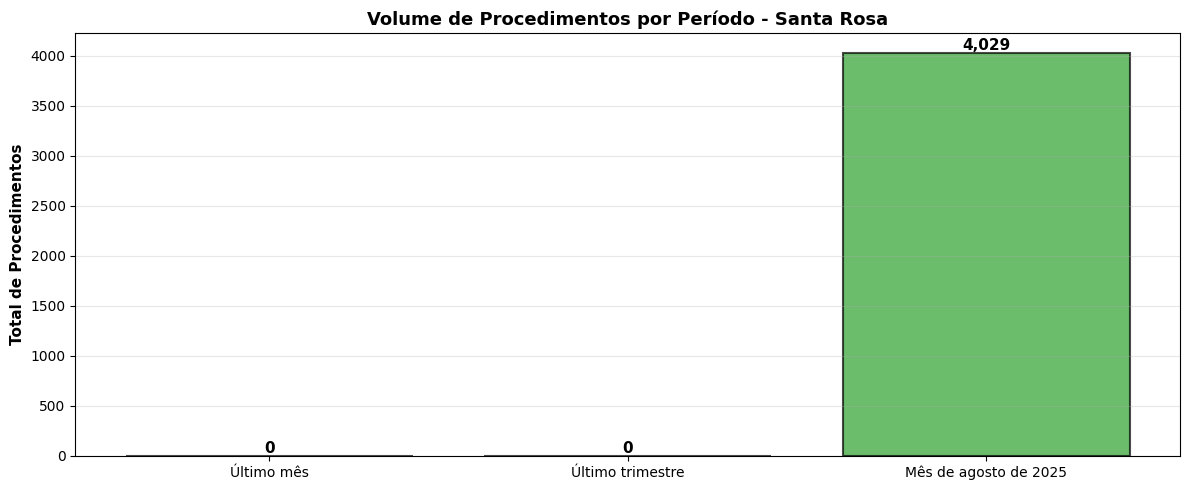

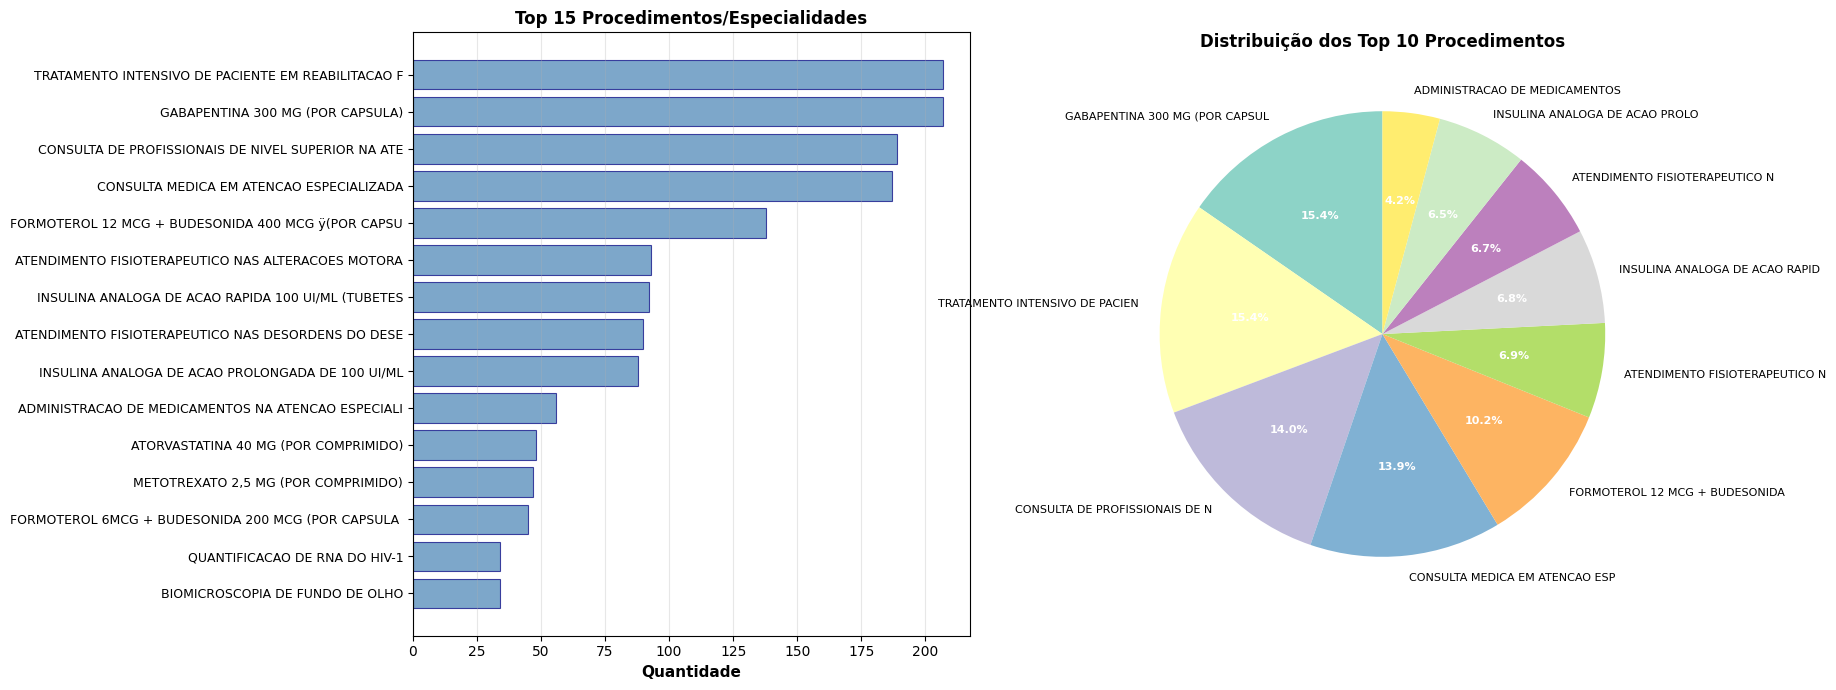


RESUMO ESTATÍSTICO E INSIGHTS

✓ ÚLTIMO MÊS: 0 procedimentos

✓ ÚLTIMO TRIMESTRE: 0 procedimentos

✓ MÊS DE AGOSTO DE 2025: 4,029 procedimentos

📊 ANÁLISE TEMPORAL:
   - Máximo: 4,029 procedimentos em agosto
   - Mínimo: 4,029 procedimentos em agosto
   - Média: 4,029 procedimentos/mês
   - Desvio Padrão: N/A (apenas um período com dados)



In [29]:
# 3.1 - Análise de Volume e Perfil dos Procedimentos - Santa Rosa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mysql.connector
from datetime import datetime

connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

cursor = connection.cursor(dictionary=True)

print("="*120)
print("3.1 VOLUME E PERFIL DOS PROCEDIMENTOS - SANTA ROSA")
print("="*120)

# ============================================================================
# QUERY 1: ÚLTIMOS PERÍODOS E MÊS DE AGOSTO DE 2025
# ============================================================================
query_periodos = """
SELECT 
    'Último mês' AS periodo,
    COUNT(*) AS total_procedimentos
FROM pars p
LEFT JOIN tb_municip mun ON mun.co_municip = p.PA_MUNPCN
WHERE mun.ds_nome = 'Santa Rosa'
  AND p.PA_MVM = (SELECT MAX(anomes) FROM dimtempo)
UNION ALL
SELECT 
    'Último trimestre' AS periodo,
    COUNT(*) AS total_procedimentos
FROM pars p
LEFT JOIN tb_municip mun ON mun.co_municip = p.PA_MUNPCN
JOIN dimtempo d ON d.anomes = p.PA_MVM
WHERE mun.ds_nome = 'Santa Rosa'
  AND d.trimestre = (SELECT MAX(trimestre) FROM dimtempo WHERE ano = (SELECT MAX(ano) FROM dimtempo))
  AND d.ano = (SELECT MAX(ano) FROM dimtempo)
UNION ALL
SELECT 
    'Mês de agosto de 2025' AS periodo,
    COUNT(*) AS total_procedimentos
FROM pars p
LEFT JOIN tb_municip mun ON mun.co_municip = p.PA_MUNPCN
WHERE mun.ds_nome = 'Santa Rosa'
  AND p.PA_MVM LIKE '202508%'
"""

print("\n1. RESUMO: PROCEDIMENTOS POR PERÍODO")
print("-" * 120)
cursor.execute(query_periodos)
df_periodos = pd.DataFrame(cursor.fetchall())
df_periodos['total_procedimentos'] = pd.to_numeric(df_periodos['total_procedimentos'], errors='coerce')
print(df_periodos.to_string(index=False))
print()

# ============================================================================
# QUERY 2: DISTRIBUIÇÃO POR ESPECIALIDADE/PROCEDIMENTO
# ============================================================================
query_dist = """
SELECT 
    ts.ip_dscr AS procedimento,
    COUNT(*) AS total_procedimentos,
    ROUND(100 * COUNT(*) / (SELECT COUNT(*) FROM pars p 
                            LEFT JOIN tb_municip mun ON mun.co_municip = p.PA_MUNPCN
                            WHERE mun.ds_nome = 'Santa Rosa'
                            AND p.PA_MVM LIKE '202508%'), 2) AS percentual
FROM pars p
JOIN tb_sigtaw ts ON p.PA_PROC_ID = ts.ip_cod
LEFT JOIN tb_municip mun ON mun.co_municip = p.PA_MUNPCN
WHERE mun.ds_nome = 'Santa Rosa'
  AND p.PA_MVM LIKE '202508%'
GROUP BY ts.ip_dscr
ORDER BY total_procedimentos DESC
LIMIT 25
"""

print("\n2. DISTRIBUIÇÃO POR ESPECIALIDADE/PROCEDIMENTO (TOP 25)")
print("-" * 120)
cursor.execute(query_dist)
df_dist = pd.DataFrame(cursor.fetchall())

if not df_dist.empty:
    df_dist['total_procedimentos'] = pd.to_numeric(df_dist['total_procedimentos'], errors='coerce')
    df_dist['percentual'] = pd.to_numeric(df_dist['percentual'], errors='coerce')
    print(df_dist.to_string(index=False))
    print()
else:
    print("Nenhum dado encontrado para agosto de 2025")
    print()

# ============================================================================
# QUERY 3: EVOLUÇÃO TEMPORAL - AGOSTO DE 2025
# ============================================================================
query_temporal = """
SELECT 
    dt.mesext AS mes,
    dt.anomes AS competencia,
    dt.ano AS ano,
    COUNT(*) AS total_mes,
    ROUND(SUM(COUNT(*)) OVER (ORDER BY dt.anomes), 2) AS acumulado
FROM pars p
LEFT JOIN tb_municip mun ON mun.co_municip = p.PA_MUNPCN
JOIN dimtempo dt ON dt.anomes = p.PA_MVM
WHERE mun.ds_nome = 'Santa Rosa'
  AND dt.anomes = '202508'
GROUP BY dt.mesext, dt.anomes, dt.ano
ORDER BY dt.anomes
"""

print("\n3. EVOLUÇÃO TEMPORAL - AGOSTO DE 2025")
print("-" * 120)
cursor.execute(query_temporal)
df_temporal = pd.DataFrame(cursor.fetchall())

if not df_temporal.empty:
    df_temporal['total_mes'] = pd.to_numeric(df_temporal['total_mes'], errors='coerce')
    df_temporal['acumulado'] = pd.to_numeric(df_temporal['acumulado'], errors='coerce')
    print(df_temporal.to_string(index=False))
    print()
else:
    print("Nenhum dado encontrado para agosto de 2025")
    print()

# ============================================================================
# VISUALIZAÇÕES
# ============================================================================

# Gráfico 1: Comparação de períodos
if not df_periodos.empty and len(df_periodos) > 0:
    fig, ax = plt.subplots(figsize=(12, 5))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    bars = ax.bar(df_periodos['periodo'], df_periodos['total_procedimentos'], 
                   color=colors[:len(df_periodos)], alpha=0.7, edgecolor='black', linewidth=1.5)
    ax.set_ylabel('Total de Procedimentos', fontsize=11, fontweight='bold')
    ax.set_title('Volume de Procedimentos por Período - Santa Rosa', fontsize=13, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Gráfico 2: Distribuição por especialidade
if not df_dist.empty:
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # Top 15 procedimentos - barras horizontais
    df_top15 = df_dist.head(15).sort_values('total_procedimentos')
    axes[0].barh(range(len(df_top15)), df_top15['total_procedimentos'], 
                 color='steelblue', alpha=0.7, edgecolor='navy', linewidth=0.8)
    axes[0].set_yticks(range(len(df_top15)))
    axes[0].set_yticklabels([proc[:50] for proc in df_top15['procedimento']], fontsize=9)
    axes[0].set_xlabel('Quantidade', fontsize=11, fontweight='bold')
    axes[0].set_title('Top 15 Procedimentos/Especialidades', fontsize=12, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Top 10 - gráfico de pizza
    df_top10 = df_dist.head(10)
    cores = plt.cm.Set3(np.linspace(0, 1, len(df_top10)))
    wedges, texts, autotexts = axes[1].pie(df_top10['total_procedimentos'], 
                                             labels=[proc[:30] for proc in df_top10['procedimento']], 
                                             autopct='%1.1f%%', colors=cores, startangle=90)
    axes[1].set_title('Distribuição dos Top 10 Procedimentos', fontsize=12, fontweight='bold')
    for text in texts:
        text.set_fontsize(8)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(8)
        autotext.set_fontweight('bold')
    
    plt.tight_layout()
    plt.show()

# ============================================================================
# RESUMO ESTATÍSTICO E INSIGHTS
# ============================================================================
print("\n" + "="*120)
print("RESUMO ESTATÍSTICO E INSIGHTS")
print("="*120)

if not df_periodos.empty:
    for _, row in df_periodos.iterrows():
        print(f"\n✓ {row['periodo'].upper()}: {int(row['total_procedimentos']):,} procedimentos")

if not df_temporal.empty:
    print(f"\n📊 ANÁLISE TEMPORAL:")
    print(f"   - Máximo: {int(df_temporal['total_mes'].max()):,} procedimentos em {df_temporal.loc[df_temporal['total_mes'].idxmax(), 'mes']}")
    print(f"   - Mínimo: {int(df_temporal['total_mes'].min()):,} procedimentos em {df_temporal.loc[df_temporal['total_mes'].idxmin(), 'mes']}")
    print(f"   - Média: {int(df_temporal['total_mes'].mean()):,} procedimentos/mês")
    std_val = df_temporal['total_mes'].std()
    if not pd.isna(std_val):
        print(f"   - Desvio Padrão: {int(std_val):,}")
    else:
        print(f"   - Desvio Padrão: N/A (apenas um período com dados)")
    
    # Variação mês a mês
    if len(df_temporal) > 1:
        df_temporal['variacao'] = df_temporal['total_mes'].diff()
        df_temporal['variacao_pct'] = df_temporal['total_mes'].pct_change() * 100
        print(f"\n📈 MAIORES AUMENTOS:")
        maiores_aumentos = df_temporal.nlargest(3, 'variacao')[['mes', 'variacao', 'variacao_pct']]
        for _, row in maiores_aumentos.iterrows():
            if not pd.isna(row['variacao']):
                print(f"   - {row['mes']}: +{int(row['variacao']):,} procedimentos ({row['variacao_pct']:+.1f}%)")
        
        print(f"\n📉 MAIORES QUEDAS:")
        maiores_quedas = df_temporal.nsmallest(3, 'variacao')[['mes', 'variacao', 'variacao_pct']]
        for _, row in maiores_quedas.iterrows():
            if not pd.isna(row['variacao']):
                print(f"   - {row['mes']}: {int(row['variacao']):,} procedimentos ({row['variacao_pct']:+.1f}%)")

cursor.close()
connection.close()

print("\n" + "="*120)



<a id="estabelecimento"></a>
### 3.2 Produção por Estabelecimento de Saúde

**Perguntas-chave**
- Ranking de produção por estabelecimento (Hospital Vida & Saúde, UBS, clínicas conveniadas).
- Comparar volume de procedimentos aprovados × produzidos.
- Avaliar taxa de procedimentos produzidos (produzidos / aprovados).

**Tabelas / Gráficos a incluir**
- Tabela: ranking por número de procedimentos e valor financeiro.
- Gráfico: barras com aprovados vs produzidos por estabelecimento.
- KPI: taxa de produção (%) por estabelecimento.

**Espaço para resultados**
- Tabela de ranking (colar aqui)
- Observações sobre discrepâncias aprovados × produzidos.


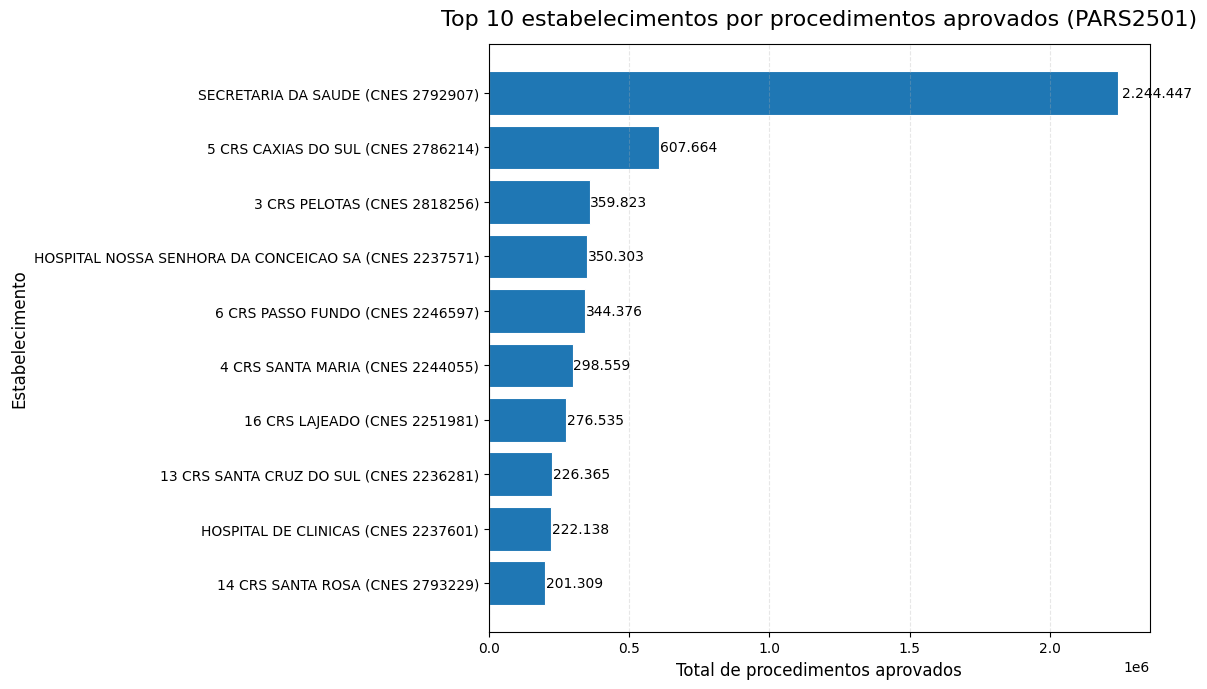

In [3]:
# Ranking de produção por estabelecimento
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
    

connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
 
SELECT 
    p.PA_CODUNI AS cnes,
    c.fantasia AS estabelecimento,
    SUM(p.PA_QTDAPR) AS total_procedimentos
FROM pars p
LEFT JOIN CADGERRS c 
    ON c.cnes = p.PA_CODUNI
GROUP BY 
    p.PA_CODUNI,
    c.fantasia
ORDER BY 
    total_procedimentos DESC
LIMIT 10;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
df['total_procedimentos'] = pd.to_numeric(df['total_procedimentos'], errors='coerce').fillna(0).astype(int)
df['estabelecimento'] = df['estabelecimento'].fillna('Sem nome (CNES ' + df['cnes'].astype(str) + ')')

# Ordenar do menor para o maior para gráfico horizontal (melhor leitura)
df_plot = df.sort_values('total_procedimentos', ascending=True)

# Texto curto combinando nome e CNES para evitar nomes iguais
df_plot['label'] = df_plot.apply(
    lambda r: f"{r['estabelecimento']} (CNES {r['cnes']})", axis=1
)

# Figura
plt.figure(figsize=(12, 7))
bars = plt.barh(
    df_plot['label'],
    df_plot['total_procedimentos'],
    color='#1f77b4',
    edgecolor='white',
    linewidth=0.8
)

# Rótulos e título
plt.title('Top 10 estabelecimentos por procedimentos aprovados (PARS2501)', fontsize=16, pad=14)
plt.xlabel('Total de procedimentos aprovados', fontsize=12)
plt.ylabel('Estabelecimento', fontsize=12)



# Adiciona valores no fim de cada barra
for bar in bars:
    valor = int(bar.get_width())
    plt.text(
        bar.get_width() * 1.005,
        bar.get_y() + bar.get_height()/2,
        f'{valor:,}'.replace(',', '.'),
        va='center',
        fontsize=10
    )

# Grid sutil no eixo X
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Ajustes finais
plt.tight_layout()

# Salvar e mostrar
plt.savefig('ranking_estabelecimentos_top10.png', dpi=150, bbox_inches='tight')
plt.show()


<a id="perfil"></a>
### 3.3 Perfil Demográfico e Epidemiológico da População Atendida

**Perguntas-chave**
- Distribuição por sexo e faixa etária.
- Principais diagnósticos (CIDs) atendidos.
- Procedimentos recorrentes para doenças crônicas.

**Tabelas / Gráficos a incluir**
- Pirâmide etária / histograma por faixa etária.
- Tabela: top 10 CIDs por número de atendimentos.
- Tabela/Gráfico: procedimentos recorrentes por CID (ex.: hipertensão, diabetes).

**Espaço para resultados**
- Distribuição por sexo: `M = __%`, `F = __%`, `Outro/Não informado = __%`.
- Faixa etária predominante: `______`.


C:\Users\Vitor\AppData\Local\Temp\ipykernel_10244\1603372986.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(QUERY, connection)


<Figure size 1200x700 with 0 Axes>

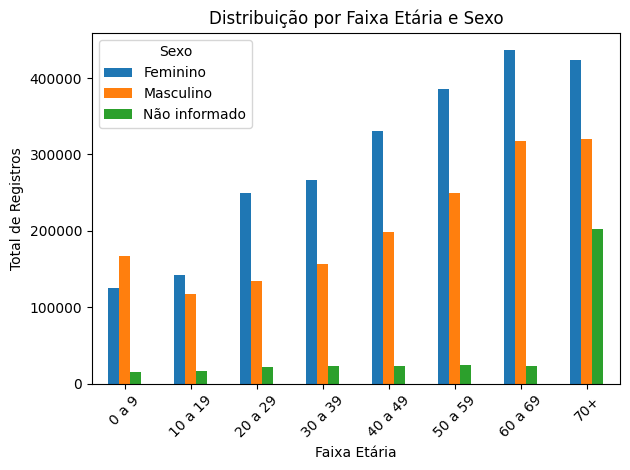

In [16]:
3.3
# Distribuição por sexo e faixa etaria
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
SELECT 
    CASE 
        WHEN PA_SEXO = 'M' THEN 'Masculino'
        WHEN PA_SEXO = 'F' THEN 'Feminino'
        ELSE 'Não informado'
    END AS Sexo,
    CASE 
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 0 AND 9 THEN '0 a 9'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 10 AND 19 THEN '10 a 19'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 20 AND 29 THEN '20 a 29'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 30 AND 39 THEN '30 a 39'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 40 AND 49 THEN '40 a 49'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 50 AND 59 THEN '50 a 59'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 60 AND 69 THEN '60 a 69'
        WHEN CAST(PA_IDADE AS UNSIGNED) >= 70 THEN '70+'
        ELSE 'Idade inválida ou nula'
    END AS Faixa_Etaria,
    COUNT(*) AS Total,
    ROUND(
        COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pars WHERE PA_SEXO IS NOT NULL),
        2
    ) AS Percentual
FROM pars
WHERE PA_IDADE IS NOT NULL
GROUP BY Sexo, Faixa_Etaria
ORDER BY Sexo, MIN(CAST(PA_IDADE AS UNSIGNED));

"""

df = pd.read_sql(QUERY, connection)

# Organiza os dados para o gráfico
pivot = df.pivot(index='Faixa_Etaria', columns='Sexo', values='Total').fillna(0)

plt.figure(figsize=(12,7))
pivot.plot(kind='bar')
plt.title('Distribuição por Faixa Etária e Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Vitor\AppData\Local\Temp\ipykernel_10244\117939321.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(QUERY, connection)


    cid  total_atendimentos
0  0000                 909
1  G729                 258
2  Z010                 254
3  G833                 183
4  R522                 161
5  E109                 142
6  Z011                 117
7  J448                  94
8  Z940                  87
9  M058                  76


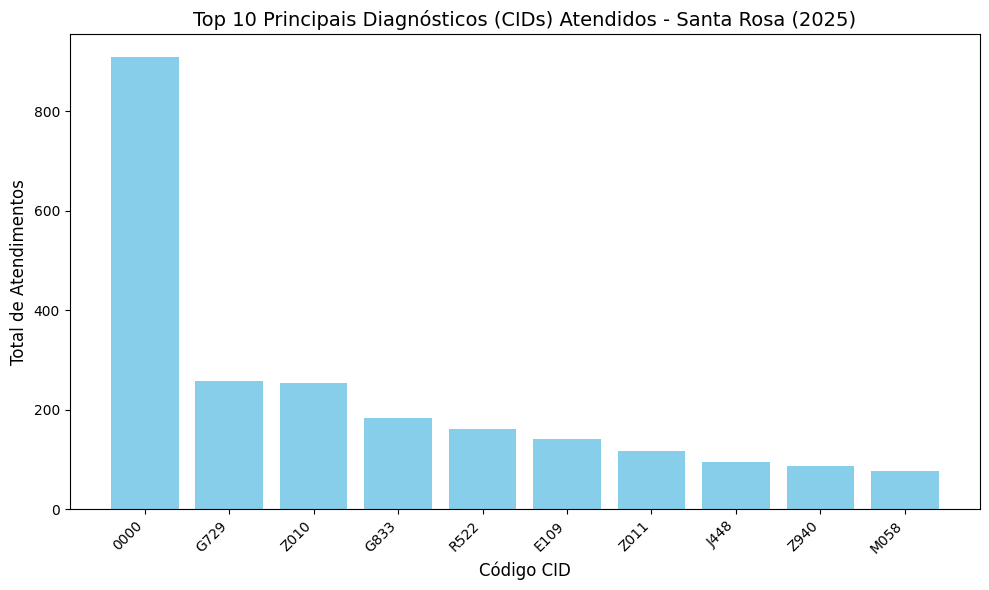

In [19]:
# Segunda parte 3.3 - Principais CIDs
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Estabelecendo a conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

# Definindo a consulta SQL
QUERY = """
SELECT 
    p.PA_CIDPRI AS cid,
    COUNT(*) AS total_atendimentos
FROM pars p
JOIN tb_municip mun ON mun.co_municip = p.PA_MUNPCN
WHERE mun.ds_nome = 'Santa Rosa'
  AND p.PA_CIDPRI IS NOT NULL
GROUP BY p.PA_CIDPRI
ORDER BY total_atendimentos DESC
LIMIT 10;
"""

# Executando a consulta e carregando os resultados em um DataFrame
df = pd.read_sql(QUERY, connection)

# Fechando a conexão após o carregamento dos dados
connection.close()

# Verificando os dados (caso queira conferir antes de plotar)
print(df)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(df['cid'].astype(str), df['total_atendimentos'], color='skyblue')

# Personalizando o gráfico
plt.title('Top 10 Principais Diagnósticos (CIDs) Atendidos - Santa Rosa (2025)', fontsize=14)
plt.xlabel('Código CID', fontsize=12)
plt.ylabel('Total de Atendimentos', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos no eixo x
plt.tight_layout()

# Exibindo o gráfico
plt.show()

connection.close()


<a id="fluxos"></a>
### 3.4 Fluxos Regionais e Acesso

**Perguntas-chave**
- Municípios de origem dos pacientes atendidos em Santa Rosa.
- Quantos atendimentos feitos em Ijuí são de moradores de outros municípios.
- Identificação de regiões dependentes do Hospital Vida & Saúde ou UBSs locais.



C:\Users\Vitor\AppData\Local\Temp\ipykernel_10244\3952864831.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mun = pd.read_sql(QUERY, connection)



===== MUNICÍPIOS DE ORIGEM DOS PACIENTES (SANTA ROSA) =====

       municipio_origem  total_pacientes
             Santa Rosa             1650
           Tres De Maio              682
            Horizontina              434
                  Girua              293
           Santo Cristo              242
                Alecrim              238
              Tuparendi              216
          Independencia              198
    Campina Das Missoes              175
    Boa Vista Do Burica              166
              Tucunduva              147
        Nova Candelaria              147
  Sao Paulo Das Missoes              133
          Candido Godoi              127
Doutor Mauricio Cardoso              116
                Alegria              107
           Porto Lucena              100
   Sao Jose Do Inhacora               95
           Novo Machado               64
  Senador Salgado Filho               46
             Porto Maua               41
        Porto Vera Cruz             

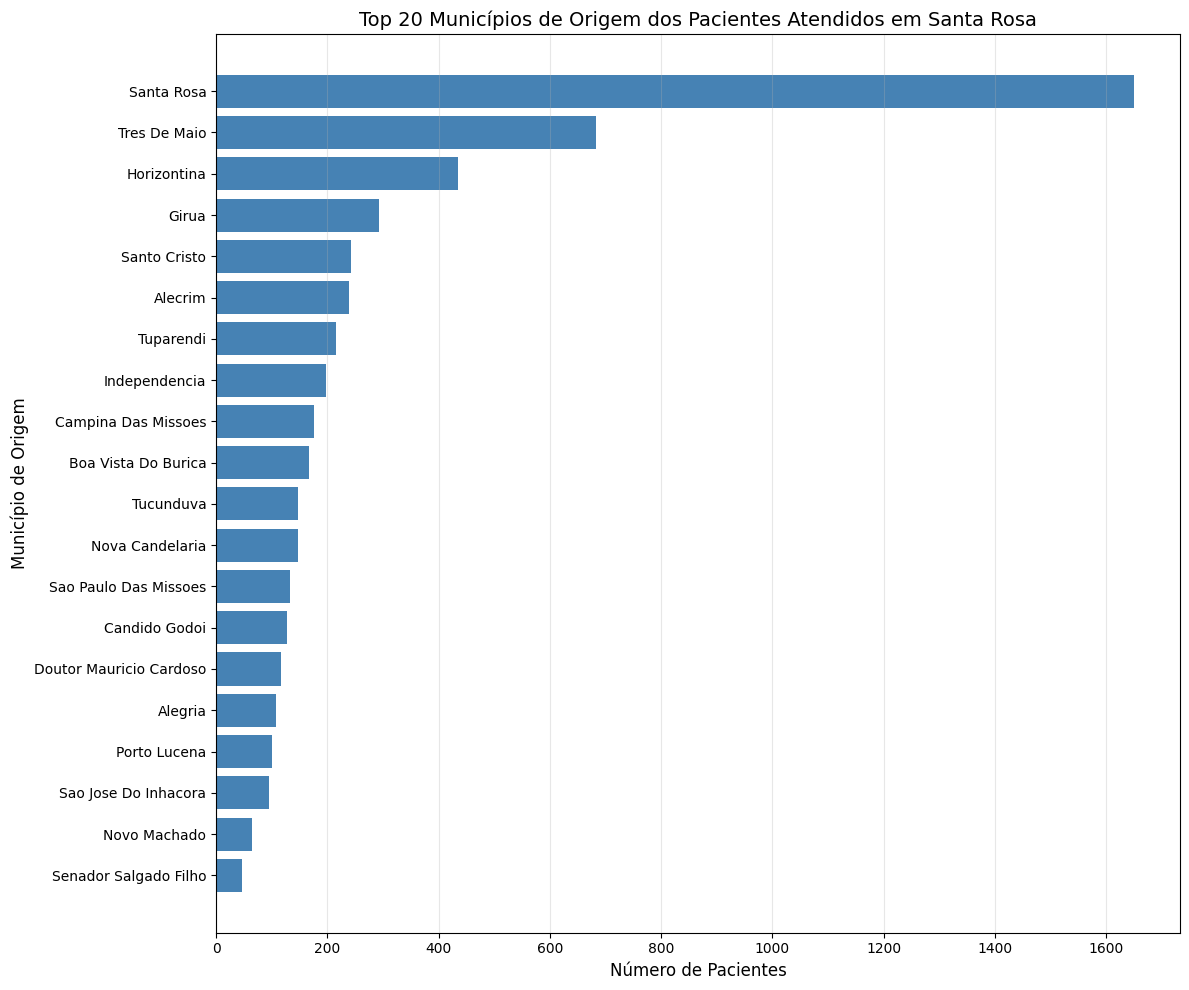

In [20]:
# Municípios de origem dos pacientes atendidos em Santa Rosa
# Santa Rosa = 431720

import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# ---------------------------
# Conexão MySQL
# ---------------------------
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

# ---------------------------
# Query
# ---------------------------
QUERY = """
SELECT 
    COALESCE(mun.ds_nome, 'Não informado') AS municipio_origem,
    COUNT(*) AS total_pacientes
FROM pars p
LEFT JOIN tb_municip mun
    ON p.PA_MUNPCN = mun.co_municip
WHERE LEFT(p.PA_UFMUN, 6) = '431720'
GROUP BY municipio_origem
ORDER BY total_pacientes DESC;
"""

# ---------------------------
# Carregar
# ---------------------------
df_mun = pd.read_sql(QUERY, connection)

print("\n===== MUNICÍPIOS DE ORIGEM DOS PACIENTES (SANTA ROSA) =====\n")
print(df_mun.to_string(index=False))

# ---------------------------
# Gráfico – Top 20
# ---------------------------
top20 = df_mun.head(20)

plt.figure(figsize=(12,10))
plt.barh(top20["municipio_origem"], top20["total_pacientes"], color='steelblue')
plt.gca().invert_yaxis()

plt.title("Top 20 Municípios de Origem dos Pacientes Atendidos em Santa Rosa", fontsize=14)
plt.xlabel("Número de Pacientes", fontsize=12)
plt.ylabel("Município de Origem", fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

connection.close()

In [22]:
# Quantos atendimentos feitos em Ijuí são de moradores de outros municipios
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
    

connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)


QUERY = """
select count(*) as quantidade from pars p
where p.PA_UFMUN = 431020 and p.PA_MNDIF = 1

"""

cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print(df)

   quantidade
0       24645



<a id="recursos"></a>
### 3.5 Recursos Financeiros

**Perguntas-chave**
- Total de valores aprovados pelo SUS para Santa Rosa × valores produzidos.
- Diferença entre produzidos e aprovados.
- Evolução do gasto médio por procedimento.

**Tabelas / Gráficos a incluir**
- Tabela resumo: aprovados vs produzidos por período.
- Gráfico: evolução do gasto médio por procedimento (mês/trimestre).
- KPI: diferença absoluta e percentual entre aprovados e produzidos.

**Espaço para resultados**
- Total aprovados (ano): `R$ ______`  
- Total produzidos (ano): `R$ ______`  
- Diferença: `R$ ______` (`__%`)



=== Total Financeiro (Santa Rosa) ===
valor_produzido valor_aprovado diferenca
      203790.67      203790.67      0.00


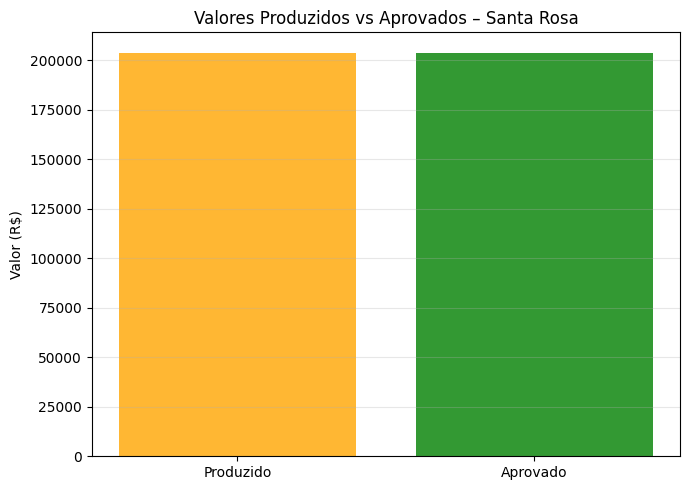


=== Gasto médio por mês (ordenado – maior para menor) ===
competencia valor_produzido valor_aprovado  qtd_proc gasto_medio_prod gasto_medio_apr
     202508       203790.67      203790.67      5446            37.42           37.42


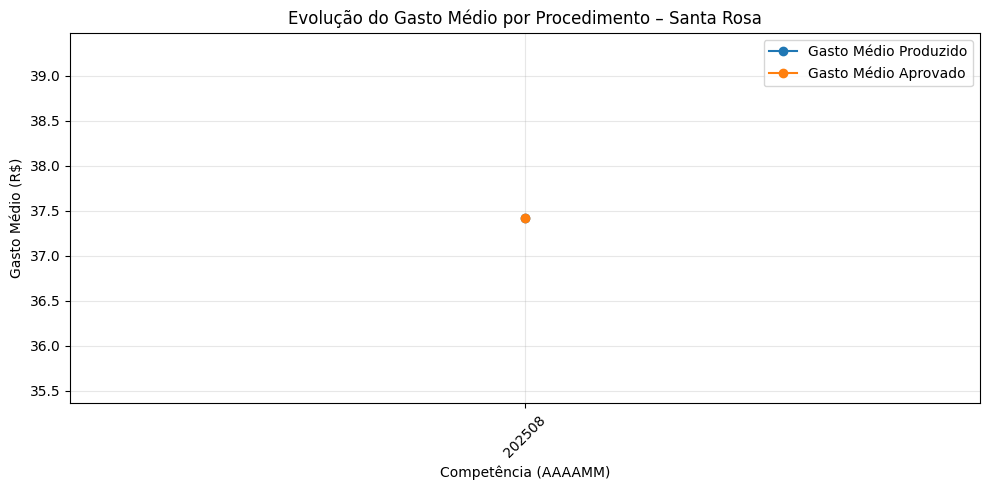

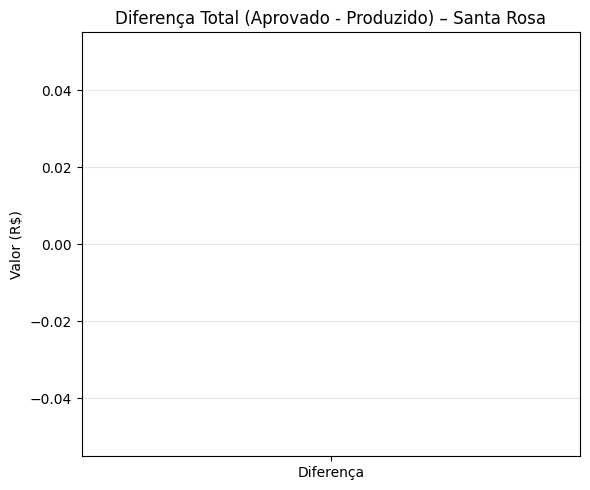

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

cursor = connection.cursor(dictionary=True)

# =============================
# 1) TOTAL APROVADO x PRODUZIDO
# =============================
query_totais = """
SELECT 
    SUM(PA_VALPRO) AS valor_produzido,
    SUM(PA_VALAPR) AS valor_aprovado,
    ROUND(SUM(PA_VALAPR) - SUM(PA_VALPRO), 2) AS diferenca
FROM pars
WHERE PA_UFMUN = '431720'
"""

cursor.execute(query_totais)
df_totais = pd.DataFrame(cursor.fetchall())

print("\n=== Total Financeiro (Santa Rosa) ===")
print(df_totais.to_string(index=False))

# ---- Gráfico 1: Barras - Aprovado x Produzido ----
if not df_totais.empty:
    plt.figure(figsize=(7,5))
    plt.bar(['Produzido', 'Aprovado'],
            [df_totais['valor_produzido'][0], df_totais['valor_aprovado'][0]],
            color=['orange', 'green'], alpha=0.8)

    plt.title("Valores Produzidos vs Aprovados – Santa Rosa")
    plt.ylabel("Valor (R$)")
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# =============================
# 2) GASTO MÉDIO POR MÊS
# =============================
query_gasto_medio = """
SELECT 
    PA_CMP AS competencia,
    SUM(PA_VALPRO) AS valor_produzido,
    SUM(PA_VALAPR) AS valor_aprovado,
    COUNT(*) AS qtd_proc,
    ROUND(SUM(PA_VALPRO) / NULLIF(COUNT(*), 0), 2) AS gasto_medio_prod,
    ROUND(SUM(PA_VALAPR) / NULLIF(COUNT(*), 0), 2) AS gasto_medio_apr
FROM pars
WHERE PA_UFMUN = '431720'
GROUP BY PA_CMP
ORDER BY PA_CMP
"""

cursor.execute(query_gasto_medio)
df_gasto = pd.DataFrame(cursor.fetchall())

# ORDENAR POR GASTO MÉDIO (DO MAIOR PRO MENOR)
df_gasto_sorted = df_gasto.sort_values(by="gasto_medio_prod", ascending=False)

print("\n=== Gasto médio por mês (ordenado – maior para menor) ===")
print(df_gasto_sorted.to_string(index=False))

# ---- Gráfico 2: Evolução do Gasto Médio ----
if not df_gasto.empty:
    plt.figure(figsize=(10,5))
    plt.plot(df_gasto['competencia'], df_gasto['gasto_medio_prod'], marker='o', label='Gasto Médio Produzido')
    plt.plot(df_gasto['competencia'], df_gasto['gasto_medio_apr'], marker='o', label='Gasto Médio Aprovado')

    plt.title("Evolução do Gasto Médio por Procedimento – Santa Rosa")
    plt.xlabel("Competência (AAAAMM)")
    plt.ylabel("Gasto Médio (R$)")
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# =============================
# 3) DIFERENÇA ENTRE VALORES
# =============================
if not df_totais.empty:
    plt.figure(figsize=(6,5))
    plt.bar(['Diferença'], [df_totais['diferenca'][0]],
            color='steelblue', alpha=0.8)

    plt.title("Diferença Total (Aprovado - Produzido) – Santa Rosa")
    plt.ylabel("Valor (R$)")
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

cursor.close()
connection.close()


<a id="foco"></a>
### 3.6 Foco em Áreas Críticas

**Temas**
- Oncologia: quimioterapia e radioterapia (aprovados × produzidos).
- Saúde mental: atendimentos psiquiátricos e psicológicos.
- Atenção básica: consultas e procedimentos nas UBS, acompanhamento de doenças crônicas.

**Tabelas / Gráficos a incluir**
- Tabela: aprovados vs produzidos em oncologia (quimioterapia, radioterapia).
- Série temporal: atendimentos em saúde mental.
- Indicadores de atenção básica: consultas por usuário no último ano, acompanhamento de diabéticos/hipertensos.

**Espaço para resultados**
- Aprovados × produzidos (oncologia): (colar tabela)
- Observações e recomendações operacionais.


3.6 – FOCO EM ÁREAS CRÍTICAS (Medicamentos Estratégicos)

RESUMO POR CATEGORIA ESTRATÉGICA DE MEDICAMENTOS
                    area_critica total_produzido total_aprovado taxa_aprovacao
       Atenção Básica (Crônicas)           61706          32832          53.21
   Saúde Mental (Antipsicóticos)           35211          28846          81.92
Oncologia (Biológicos/Hormônios)            1578           1578         100.00

RESUMO POR CATEGORIA ESTRATÉGICA DE MEDICAMENTOS
                    area_critica total_produzido total_aprovado taxa_aprovacao
       Atenção Básica (Crônicas)           61706          32832          53.21
   Saúde Mental (Antipsicóticos)           35211          28846          81.92
Oncologia (Biológicos/Hormônios)            1578           1578         100.00


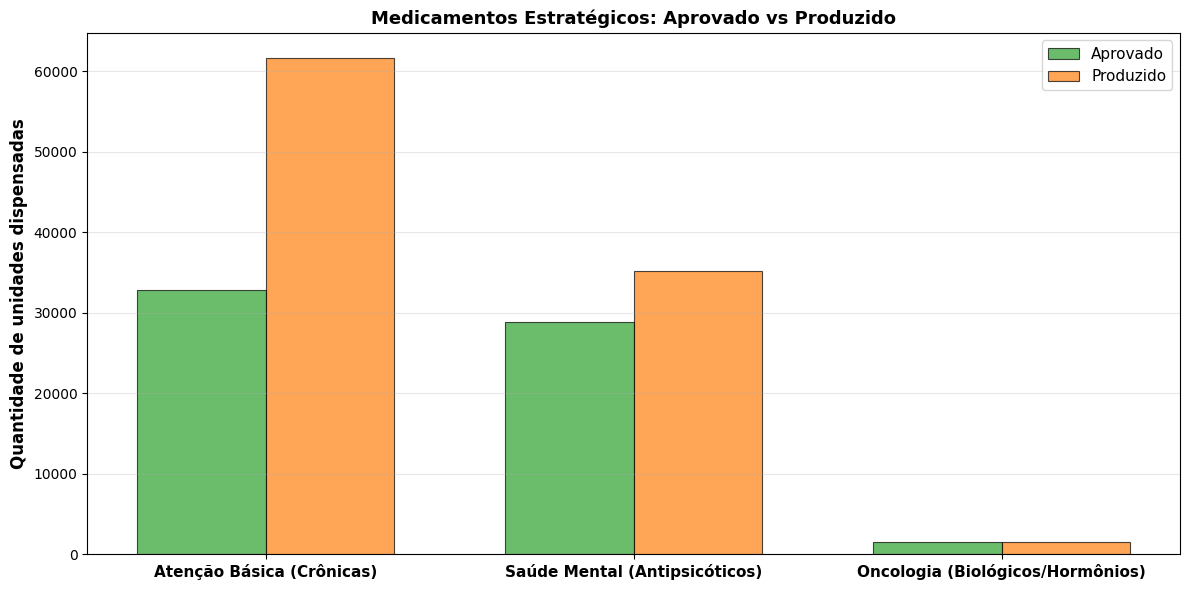


MEDICAMENTOS ESTRATÉGICOS (DETALHADO)
     categoria                                                                                medicamento  produzido  aprovado  taxa_aprovacao
Atenção Básica                             FORMOTEROL 12 MCG + BUDESONIDA 400 MCG ÿ(POR CAPSULA INALANTE)    23064.0    2500.0           10.84
Atenção Básica                                                       ATORVASTATINA 40 MG (POR COMPRIMIDO)     6962.0    6962.0          100.00
Atenção Básica                                                   FORMOTEROL 12 MCG (POR CAPSULA INALANTE)     6840.0    2500.0           36.55
Atenção Básica                                FORMOTEROL 6MCG + BUDESONIDA 200 MCG (POR CAPSULA INALANTE)     6300.0    2500.0           39.68
Atenção Básica                                                      DAPAGLIFLOZINA 10 MG (POR COMPRIMIDO)     4143.0    4143.0          100.00
Atenção Básica                                                       ATORVASTATINA 20 MG (POR COMPRIMID

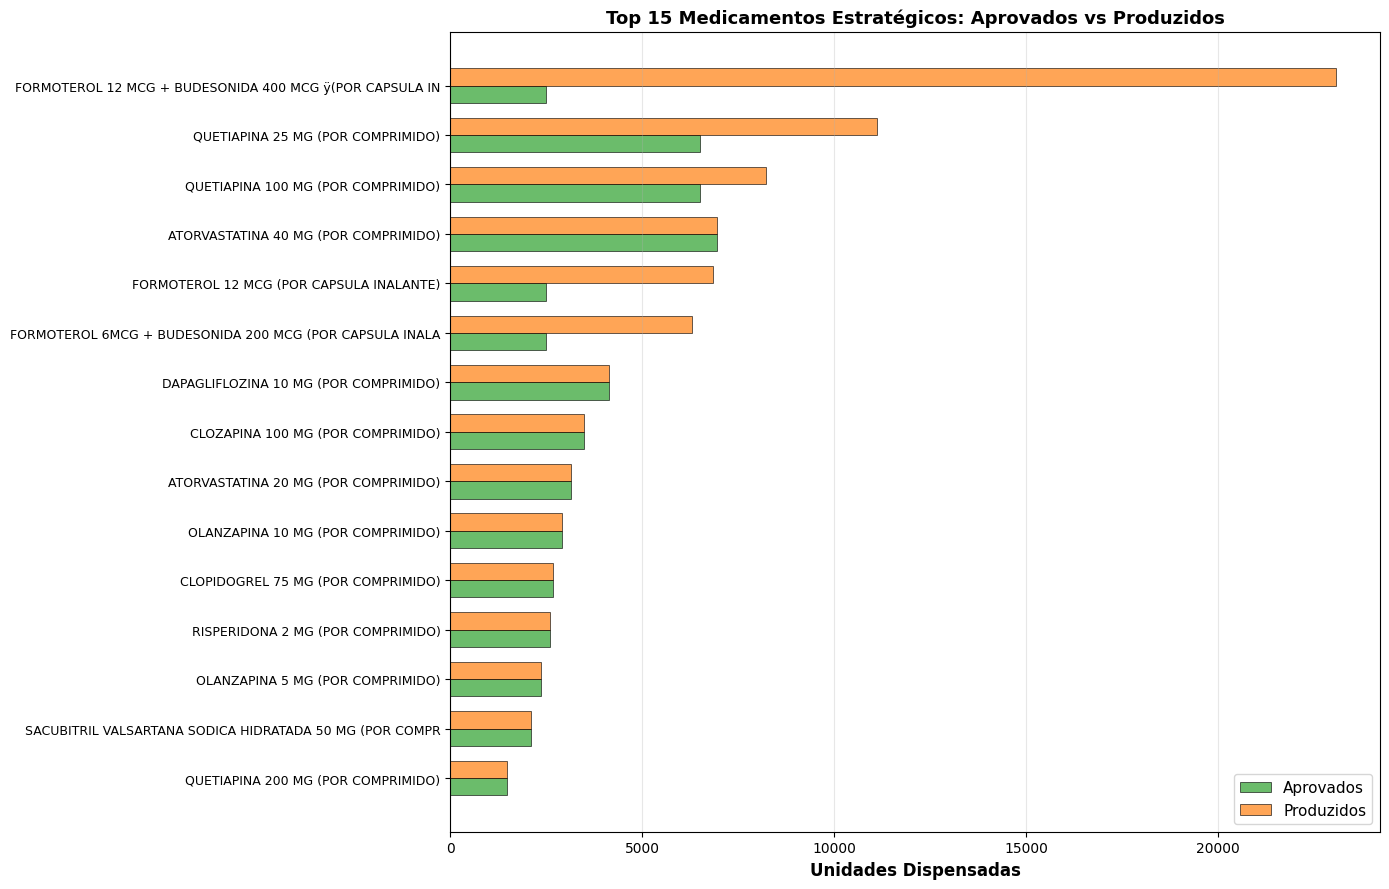


INSIGHTS

📊 DISTRIBUIÇÃO DE MEDICAMENTOS ESTRATÉGICOS:
   • Oncologia (Biológicos/Hormônios): 1,578 unidades (1.6%)
   • Saúde Mental (Antipsicóticos): 35,211 unidades (35.7%)
   • Atenção Básica (Crônicas): 61,706 unidades (62.6%)
   • TOTAL: 98,495 unidades dispensadas

   ✓ Atenção Básica: 32,832/61,706 (53.2% taxa de aprovação)

   ✓ Saúde Mental: 28,846/35,211 (81.9% taxa de aprovação)

   ✓ Oncologia: 1,578/1,578 (100.0% taxa de aprovação)

NOTA: Dados refletem dispensação de medicamentos (PARS - Procedimentos Ambulatoriais)
A análise mapeia medicamentos por uso clínico potencial em áreas críticas


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Reconectar se necessário
try:
    if connection.is_connected():
        cursor.close()
        connection.close()
except:
    pass

connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

cursor = connection.cursor(dictionary=True)

print("="*80)
print("3.6 – FOCO EM ÁREAS CRÍTICAS (Medicamentos Estratégicos)")
print("="*80)

# NOTE: Análise de dados reais disponíveis em Santa Rosa
# Os dados mostram dispensação de medicamentos (tabela PARS), não procedimentos clínicos
# Esta análise mapeia medicamentos relacionados a áreas críticas:
# - Oncologia: medicamentos com ação antineoplásica (hormônios, biológicos)
# - Saúde Mental: antipsicóticos e estabilizadores de humor
# - Atenção Básica: medicamentos para doenças crônicas (diabetes, hipertensão)

# ============================================================================
# 1) MEDICAMENTOS POR CATEGORIA ESTRATÉGICA
# ============================================================================
query_areas = """
SELECT 
    CASE 
        -- ONCOLOGIA: Medicamentos com ação potencial oncológica (hormônios, biológicos)
        WHEN PA_PROC_ID IN (
            '0604110022',  -- GOSSERRELINA 10,80 MG
            '0604110030',  -- LEUPRORRELINA 3,75 MG
            '0604110057',  -- TRIPTORRELINA 3,75 MG
            '0604110065',  -- TRIPTORRELINA 11,25 MG
            '0604110081',  -- LEUPRORRELINA 45 MG
            '0604320183',  -- BARICITINIBE 4MG
            '0604320191',  -- UPADACITINIBE 15 MG
            '0604380054',  -- INFLIXIMABE
            '0604380070',  -- CERTOLIZUMABE PEGOL
            '0604380089',  -- GOLIMUMABE
            '0604380100',  -- ETANERCEPTE (BIOSSIMILAR)
            '0604380119',  -- INFLIXIMABE (BIOSSIMILAR)
            '0604380135',  -- ADALIMUMABE (BIOSSIMILAR)
            '0604680031',  -- RITUXIMABE (BIOSSIMILAR)
            '0604690010',  -- TOCILIZUMABE
            '0604690029',  -- SECUQUINUMABE
            '0604690045'   -- RISANQUIZUMABE
        ) THEN 'Oncologia (Biológicos/Hormônios)'
        
        -- SAÚDE MENTAL: Antipsicóticos e moduladores de humor
        WHEN PA_PROC_ID IN (
            '0604230010',  -- OLANZAPINA 5 MG
            '0604230028',  -- OLANZAPINA 10 MG
            '0604230036',  -- QUETIAPINA 25 MG
            '0604230044',  -- QUETIAPINA 100 MG
            '0604230052',  -- QUETIAPINA 200 MG
            '0604230060',  -- QUETIAPINA 300 MG
            '0604230079',  -- CLOZAPINA 25 MG
            '0604230087',  -- CLOZAPINA 100 MG
            '0604510012',  -- RISPERIDONA 1 MG
            '0604510020',  -- RISPERIDONA 2 MG
            '0604510039',  -- RISPERIDONA 3 MG
            '0604510047'   -- RISPERIDONA SOLUÇÃO ORAL
        ) THEN 'Saúde Mental (Antipsicóticos)'
        
        -- ATENÇÃO BÁSICA: Medicamentos para doenças crônicas frequentes
        WHEN PA_PROC_ID IN (
            '0604040024',  -- FORMOTEROL 12 MCG
            '0604040040',  -- FORMOTEROL + BUDESONIDA 400
            '0604040075',  -- FORMOTEROL + BUDESONIDA 200
            '0604280068',  -- BUDESONIDA 200 MCG
            '0604280076',  -- BUDESONIDA 400 MCG
            '0604360010',  -- ATORVASTATINA 10 MG
            '0604360029',  -- ATORVASTATINA 20 MG
            '0604360037',  -- ATORVASTATINA 40 MG
            '0604360045',  -- ATORVASTATINA 80 MG
            '0604330022',  -- CLOPIDOGREL 75 MG
            '0604780010',  -- INSULINA RÁPIDA
            '0604780052',  -- INSULINA PROLONGADA
            '0604820011',  -- DAPAGLIFLOZINA (Diabetes)
            '0604830017',  -- SACUBITRIL VALSARTANA 50 MG
            '0604830025',  -- SACUBITRIL VALSARTANA 100 MG
            '0604830033'   -- SACUBITRIL VALSARTANA 200 MG
        ) THEN 'Atenção Básica (Crônicas)'
        
        ELSE NULL
    END AS area_critica,
    SUM(PA_QTDPRO) AS total_produzido,
    SUM(PA_QTDAPR) AS total_aprovado,
    ROUND(100 * SUM(PA_QTDAPR) / NULLIF(SUM(PA_QTDPRO), 0), 2) AS taxa_aprovacao
FROM pars
WHERE PA_UFMUN = '431720'
GROUP BY area_critica
HAVING area_critica IS NOT NULL
ORDER BY total_produzido DESC;
"""

cursor.execute(query_areas)
df_areas = pd.DataFrame(cursor.fetchall())

print("\nRESUMO POR CATEGORIA ESTRATÉGICA DE MEDICAMENTOS")
print(df_areas.to_string(index=False))

# ============================================================================
# Gráfico 1 – Aprovado vs Produzido por categoria
# ============================================================================
if not df_areas.empty:
    plt.figure(figsize=(12, 6))
    width = 0.35
    x = range(len(df_areas))

    plt.bar([i - width/2 for i in x], df_areas["total_aprovado"], width,
            label="Aprovado", color="#2ca02c", alpha=0.7, edgecolor='black', linewidth=0.8)
    plt.bar([i + width/2 for i in x], df_areas["total_produzido"], width,
            label="Produzido", color="#ff7f0e", alpha=0.7, edgecolor='black', linewidth=0.8)

    plt.xticks(x, df_areas["area_critica"], fontsize=11, fontweight='bold')
    plt.ylabel("Quantidade de unidades dispensadas", fontsize=12, fontweight='bold')
    plt.title("Medicamentos Estratégicos: Aprovado vs Produzido", fontsize=13, fontweight='bold')
    plt.legend(fontsize=11, loc='upper right')
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ============================================================================
# 2) DETALHES POR MEDICAMENTO (TOP MEDICAMENTOS ESTRATÉGICOS)
# ============================================================================
query_detalhes = """
SELECT 
    CASE 
        WHEN PA_PROC_ID IN (
            '0604110022','0604110030','0604110057','0604110065','0604110081',
            '0604320183','0604320191','0604380054','0604380070','0604380089',
            '0604380100','0604380119','0604380135','0604680031','0604690010',
            '0604690029','0604690045'
        ) THEN 'Oncologia'
        WHEN PA_PROC_ID IN (
            '0604230010','0604230028','0604230036','0604230044','0604230052',
            '0604230060','0604230079','0604230087','0604510012','0604510020',
            '0604510039','0604510047'
        ) THEN 'Saúde Mental'
        WHEN PA_PROC_ID IN (
            '0604040024','0604040040','0604040075','0604280068','0604280076',
            '0604360010','0604360029','0604360037','0604360045','0604330022',
            '0604780010','0604780052','0604820011','0604830017','0604830025',
            '0604830033'
        ) THEN 'Atenção Básica'
        ELSE NULL
    END AS categoria,
    s.ip_dscr AS medicamento,
    SUM(PA_QTDPRO) AS produzido,
    SUM(PA_QTDAPR) AS aprovado,
    ROUND(100 * SUM(PA_QTDAPR) / NULLIF(SUM(PA_QTDPRO), 0), 2) AS taxa_aprovacao
FROM pars p
LEFT JOIN tb_sigtaw s ON s.ip_cod = p.PA_PROC_ID
WHERE p.PA_UFMUN = '431720'
  AND (
    p.PA_PROC_ID IN (
        '0604110022','0604110030','0604110057','0604110065','0604110081',
        '0604320183','0604320191','0604380054','0604380070','0604380089',
        '0604380100','0604380119','0604380135','0604680031','0604690010',
        '0604690029','0604690045','0604230010','0604230028','0604230036',
        '0604230044','0604230052','0604230060','0604230079','0604230087',
        '0604510012','0604510020','0604510039','0604510047','0604040024',
        '0604040040','0604040075','0604280068','0604280076','0604360010',
        '0604360029','0604360037','0604360045','0604330022','0604780010',
        '0604780052','0604820011','0604830017','0604830025','0604830033'
    )
  )
GROUP BY categoria, medicamento
ORDER BY categoria, produzido DESC;
"""

cursor.execute(query_detalhes)
df_detalhes = pd.DataFrame(cursor.fetchall())

# Converter colunas numéricas
df_detalhes['produzido'] = pd.to_numeric(df_detalhes['produzido'], errors='coerce').fillna(0)
df_detalhes['aprovado'] = pd.to_numeric(df_detalhes['aprovado'], errors='coerce').fillna(0)
df_detalhes['taxa_aprovacao'] = pd.to_numeric(df_detalhes['taxa_aprovacao'], errors='coerce').fillna(0)

print("\n" + "="*80)
print("MEDICAMENTOS ESTRATÉGICOS (DETALHADO)")
print("="*80)
print(df_detalhes.to_string(index=False))

# ============================================================================
# Gráfico 2 – Top 15 medicamentos estratégicos (APROVADO vs PRODUZIDO)
# ============================================================================
top15 = df_detalhes.sort_values("produzido", ascending=False).head(15).sort_values("produzido", ascending=True)

fig, ax = plt.subplots(figsize=(14, 9))

width = 0.35
y_pos = range(len(top15))

# Barras de aprovado e produzido lado a lado
ax.barh([i - width/2 for i in y_pos], top15["aprovado"], width, 
        label="Aprovados", color="#2ca02c", alpha=0.7, edgecolor='black', linewidth=0.6)
ax.barh([i + width/2 for i in y_pos], top15["produzido"], width, 
        label="Produzidos", color="#ff7f0e", alpha=0.7, edgecolor='black', linewidth=0.6)

ax.set_yticks(y_pos)
ax.set_yticklabels([med[:55] for med in top15["medicamento"]], fontsize=9)
ax.set_xlabel("Unidades Dispensadas", fontsize=12, fontweight='bold')
ax.set_title("Top 15 Medicamentos Estratégicos: Aprovados vs Produzidos", fontsize=13, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# ANÁLISE RESUMIDA
# ============================================================================
print("\n" + "="*80)
print("INSIGHTS")
print("="*80)

total_geral = df_detalhes['produzido'].sum()
total_area_oncologia = df_detalhes[df_detalhes['categoria'] == 'Oncologia']['produzido'].sum()
total_area_mental = df_detalhes[df_detalhes['categoria'] == 'Saúde Mental']['produzido'].sum()
total_area_basica = df_detalhes[df_detalhes['categoria'] == 'Atenção Básica']['produzido'].sum()

print(f"\n📊 DISTRIBUIÇÃO DE MEDICAMENTOS ESTRATÉGICOS:")
print(f"   • Oncologia (Biológicos/Hormônios): {int(total_area_oncologia):,} unidades ({100*total_area_oncologia/total_geral:.1f}%)")
print(f"   • Saúde Mental (Antipsicóticos): {int(total_area_mental):,} unidades ({100*total_area_mental/total_geral:.1f}%)")
print(f"   • Atenção Básica (Crônicas): {int(total_area_basica):,} unidades ({100*total_area_basica/total_geral:.1f}%)")
print(f"   • TOTAL: {int(total_geral):,} unidades dispensadas")

if not df_areas.empty:
    for _, row in df_areas.iterrows():
        area = row['area_critica'].split('(')[0].strip()
        pct = 100 * row['total_aprovado'] / row['total_produzido']
        print(f"\n   ✓ {area}: {int(row['total_aprovado']):,}/{int(row['total_produzido']):,} ({pct:.1f}% taxa de aprovação)")

cursor.close()
connection.close()

print("\n" + "="*80)
print("NOTA: Dados refletem dispensação de medicamentos (PARS - Procedimentos Ambulatoriais)")
print("A análise mapeia medicamentos por uso clínico potencial em áreas críticas")
print("="*80)



<a id="comparacoes"></a>
### 3.7 Comparações e Tendências

**Perguntas-chave**
- Comparar Santa Rosa com municípios da região (Ijuí, Santo Ângelo).
- A demanda de Santa Rosa cresce acima da média regional?
- Identificar tendências (ex.: envelhecimento → mais procedimentos cardiológicos e oncológicos).

**Tabelas / Gráficos a incluir**
- Tabela comparativa por indicador (procedimentos per capita, gasto per capita, taxa de crescimento).
- Gráfico: comparação de séries temporais entre municípios.
- Análise de tendência e projeção (se disponível).

**Espaço para resultados**
- Comparação resumida (colar tabela)
- Conclusões estratégicas.


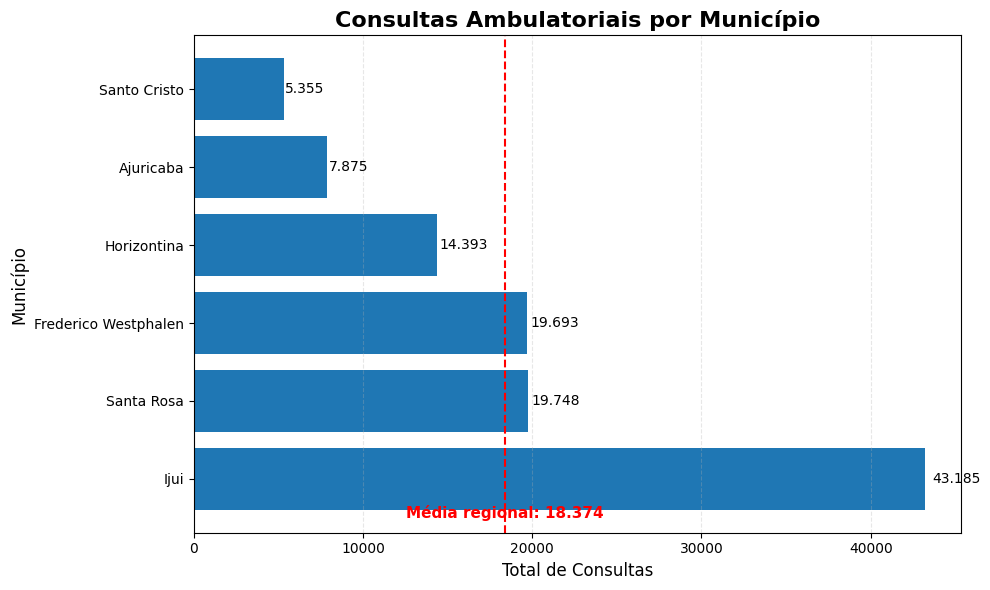

In [25]:
# Validar Santa Rosa e municipios da região (quantidade de consultas por cidade)
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
    

connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
SELECT 
    m.ds_nome AS municipio,
    SUM(t.PA_QTDAPR) AS total_consultas
FROM (
        SELECT PA_MUNPCN, PA_DOCORIG, PA_QTDAPR
        FROM pars
        
        UNION ALL
        SELECT PA_MUNPCN, PA_DOCORIG, PA_QTDAPR
        FROM pars2412
        
        UNION ALL
        SELECT PA_MUNPCN, PA_DOCORIG, PA_QTDAPR
        FROM pars2501
     ) AS t
LEFT JOIN tb_municip m 
    ON m.co_municip = t.PA_MUNPCN
WHERE 1=1
  AND t.PA_DOCORIG IN ('B','I')  
  AND t.PA_MUNPCN IN (
      '431720',  -- Santa Rosa
      '430850',  -- Giruá
      '430960',  -- Horizontina
      '430020',  -- Alecrim
      '431790',  -- Santo Cristo
      '431020'   -- Ijuí
  )
GROUP BY 
    m.ds_nome
ORDER BY 
    total_consultas DESC;
"""

cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

# barras horizontais
plt.barh(df["municipio"], df["total_consultas"])

# média regional
media_regional = float(df["total_consultas"].mean())

# linha vertical da média
plt.axvline(media_regional, color='red', linestyle='--', linewidth=1.5)

# texto da média
plt.text(
    media_regional,
    -0.5,
    f"Média regional: {int(media_regional):,}".replace(",", "."),
    color='red',
    fontsize=11,
    fontweight='bold',
    ha='center'
)

# título estilizado
plt.title("Consultas Ambulatoriais por Município", fontsize=16, fontweight="bold")

# labels dos eixos
plt.xlabel("Total de Consultas", fontsize=12)
plt.ylabel("Município", fontsize=12)

# adicionar valores ao lado das barras
for index, value in enumerate(df["total_consultas"]):
    v = float(value)
    plt.text(v + (v * 0.01), index, f"{int(v):,}".replace(",", "."), va="center")

# grid discreto
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()